In [137]:
import importlib
import gamma
importlib.reload(gamma)
from gamma import *
import math

n = 10**14
k = round(math.sqrt(n))
o = 2
g = 1

def geom_mean_of_var(n, k, o, g):
    smallest_term = 1/math.comb(n + (k-1)*g, o) ** 2
    largest_term = 1/math.comb(n, o) ** 2
    return math.sqrt(smallest_term * largest_term) * k

# print(f'                {smallest_term*k=}')
# print(f'                 {largest_term*k=}')

if geom_mean_of_var(n,k,o,g) != 0:
    print(f'{abs(geom_mean_of_var(n,k,o,g) - var_direct_np(n, k, o, g)) / geom_mean_of_var(n,k,o,g)=}')
print(f'           {geom_mean_of_var(n,k,o,g)=}')
print(f'{var_direct_np(n, k, o, g)=}')
print(f'           {var_hypo(n, k, o, g)=}')
%timeit geom_mean(n, k, o, g)
%timeit var_direct_np(n, k, o, g)
%timeit var_hypo(n, k, o, g)

abs(geom_mean_of_var(n,k,o,g) - var_direct_np(n, k, o, g)) / geom_mean_of_var(n,k,o,g)=np.float64(3.6083164650517635e-15)
           geom_mean_of_var(n,k,o,g)=3.9999992000002806e-49
var_direct_np(n, k, o, g)=np.float64(3.999999200000295e-49)
           var_hypo(n, k, o, g)=mpf('3.9999992000002933e-49')
1.07 μs ± 23.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
232 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
486 μs ± 11.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [202]:
import importlib
import gamma
importlib.reload(gamma)
from gamma import *
import math
from mpmath import mpf, binomial, mp

n = 10**3
k = int(math.sqrt(n))
o = 8
g = 4
n = mpf(n)
k = mpf(k)
o = mpf(o)
g = mpf(g)

def eq9(n,k,o,g):
    s = mpf(0)
    for i in range(int(k)):
        sq_sum = mpf(0)
        for m in range(int(o)):
            # binom = math.comb(int(o-1), int(m))
            binom = binomial(o-1, m)
            # print(f'{m=}, {binom=}')
            sign = -1 if m % 2 == 1 else 1
            frac = sign / (n + i*g - (o-1-m))
            sq_sum += binom * frac
        s += o**2 * sq_sum**2
        print(f'{o**2=} {sq_sum**2=} {s=}')
    return s

def eq9_term(n, o, g, i):
    s = mpf(0)
    for m in range(int(o)):
        # binom = math.comb(int(o-1), int(m))
        binom = binomial(o-1, m)
        # print(f'{m=}, {binom=}')
        sign = -1 if m % 2 == 1 else 1
        frac = sign / (n + i*g - (o-1-m))
        s += binom * frac
    return o * s

def direct_den(B, o, prec=53):
    with mp.workprec(prec):
        p = mpf(1)
        for j in range(int(o)):
            p /= B-j
    return p

def lemma6_den(B, o, prec=53):
    with mp.workprec(prec):
        s = mpf(0)
        # for m in range(int(o)):
        #     sign = -1 if m % 2 == 1 else 1
        #     frac = sign / ((B - (o-1-m)) * mp.factorial(m) * mp.factorial(o-1-m))
        #     s += frac
        for j in range(int(o)):
            sign = -1 if (o-1-j) % 2 == 1 else 1
            frac = sign / ((B - j) * mp.factorial(j) * mp.factorial(o-1-j))
            s += frac
        s = s
    return s

def var_term(n, o, g, i):
    return 1.0 / binomial(n+i*g, o)

def direct_inv_binom(B, o, prec=53):
    with mp.workprec(prec):
        return 1.0 / binomial(B, o)
    
def direct_inv_comb(B, o, prec=53):
    return 1.0 / math.comb(int(B), int(o))

def lemma6_inv_binom_mp(B, o, prec=53):
    with mp.workprec(prec):
        s = mpf(0)
        for m in range(int(o)):
            binom = binomial(o-1, m)
            sign = -1 if m % 2 == 1 else 1
            frac = sign / (B - (o-1-m))
            s += binom * frac
            # s += sign * binom / (B - (o-1-m))
            # print(f'{s=}')
        s = o*s
    return s

def lemma6_inv_binom_sum(B, o, prec=53):
    terms = []
    B = int(B)
    o = int(o)
    for m in range(o):
        binom = math.comb(o-1, m)
        sign = -1 if m % 2 == 1 else 1
        term = sign * binom / (B - (o-1-m))
        terms.append(term)
        # s += sign * binom / (B - (o-1-m))
        # print(f'{s=}')
    s = sum(terms)
    s = o*s
    return s

def lemma6_inv_binom_fsum(B, o, prec=53):
    terms = []
    B = int(B)
    o = int(o)
    for m in range(o):
        binom = math.comb(o-1, m)
        sign = -1 if m % 2 == 1 else 1
        term = sign * binom / (B - (o-1-m))
        print(f'{sign*binom=:5}, {B - (o-1-m)=:3}, {term=}')
        terms.append(term)
    s = math.fsum(terms)
    s = o*s
    return s

def lemma6_inv_binom_mp_fsum(B, o, prec=53):
    with mp.workprec(prec):
        terms = []
        for m in range(int(o)):
            binom = binomial(o-1, m)
            sign = -1 if m % 2 == 1 else 1
            term = sign * o * binom / (B - (o-1-m))
            terms.append(term)
            # print(f'{sign*binom=}, {B - (o-1-m)=}, {term=}')
            # s += sign * binom / (B - (o-1-m))
            # print(f'{s=}')
        s = mp.fsum(terms)
        # s = o*s
    # print(f'{s=}\n***************')
    return s

def lemma6_inv_binom_no_ext_prec(B, o):
    terms = []
    for m in range(int(o)):
        binom = binomial(o-1, m)
        sign = -1 if m % 2 == 1 else 1
        term = sign * o * binom / (B - (o-1-m))
        terms.append(term)
    s = mp.fsum(terms)
    return s

def lemma6_inv_binom_mp_adaptive_fsum(B: float, o: float) -> float:
    B = mpf(B)
    o = mpf(o)
    def compute_term(m: int) -> float:
        # binom = math.comb(int(o-1), m)
        binom = binomial(o-1, m)
        sign = -1 if m % 2 == 1 else 1
        term = sign * o * binom / (B - (o-1-m))
        return term
    num_terms = int(o)
    s = adaptive_precision_sum(num_terms, compute_term)
    return s

B = mpf(100)
o = mpf(80)
# B = 100
# o = 15
prec = 90
# prec = 150
# prec = 53
# print(f'        {direct_inv_binom(B, o, prec)=}')
print(f'                  {lemma6_inv_binom_mp_fsum(B, o, prec)=}')
print(f'{adaptive_precision(lemma6_inv_binom_no_ext_prec)(B, o)=}')
print(f'                                {direct_inv_comb(B, o, prec)=}')
# print(f'{lemma6_inv_binom_mp_fsum_iv(B, o, prec)=}')
# print(f'     {lemma6_inv_binom_mp(B, o, prec)=}')
print(f'                    {lemma6_inv_binom_mp_adaptive_fsum(B, o)=}')
# print(f'{gamma.adaptive_precision(lemma6_inv_binom_mp_fsum)(B, o, prec)=}')
# print(f'{gamma.adaptive_precision(lemma6_inv_binom_mp_fsum)(B, o, prec)=}')
# print(f'     {gamma.adaptive_precision(lemma6_inv_binom_mp)(B, o, prec)=}')
# print(f'         {lemma6_inv_binom_sum(B, o, prec)=}')
# print(f'        {lemma6_inv_binom_fsum(B, o, prec)=}')

                  lemma6_inv_binom_mp_fsum(B, o, prec)=mpf('2.8168722269864622e-5')
adaptive_precision(lemma6_inv_binom_no_ext_prec)(B, o)=mpf('1.8657295267325185e-21')
                                direct_inv_comb(B, o, prec)=1.8657295267325187e-21
precision=240
                    lemma6_inv_binom_mp_adaptive_fsum(B, o)=1.8657295267325184e-21


In [ ]:
import numpy as np
import numpy.typing as npt
import math
from scipy.special import binom
import gamma
from mpmath import mpf, binomial, mp

def var_direct(n: int, k: int, o: int, g: int) -> float:
    s = 0
    for i in range(int(k)):
        s += 1 / math.comb(n + i*g, o) ** 2
    return s

def var_direct_sum(n: int, k: int, o: int, g: int) -> float:
    terms = []
    for i in range(int(k)):
        terms.append(1 / math.comb(n + i*g, o) ** 2)
    return sum(terms)

def var_direct_fsum(n: int, k: int, o: int, g: int) -> float:
    terms = []
    for i in range(int(k)):
        terms.append(1 / math.comb(n + i*g, o) ** 2)
    return math.fsum(terms)

def var_direct_mp(n: int, k: int, o: int, g: int) -> float:
    s = mpf(0)
    for i in range(int(k)):
        s += 1 / math.comb(n + i*g, o) ** 2
    return s

def var_direct_mp_fsum(n: int, k: int, o: int, g: int) -> float:
    terms = []
    for i in range(int(k)):
        terms.append(1 / binomial(n + i*g, o))
    return mp.fsum(terms, squared=True)

def reciprocals(n: int, k: int, o: int, g: int) -> npt.NDArray[np.float64]:
    indices = np.arange(k)*g
    binomial_values = binom(n + indices, o)
    return 1.0 / binomial_values

def var_direct_np(n: int, k: int, o: int, g: int) -> float:
    return np.sum(reciprocals(n, k, o, g) ** 2)  # type: ignore

def var_direct_np_sum(n: int, k: int, o: int, g: int) -> float:
    recs = list(reciprocals(n, k, o, g) ** 2)
    return sum(recs)  # type: ignore

def var_direct_np_fsum(n: int, k: int, o: int, g: int) -> float:
    return math.fsum(reciprocals(n, k, o, g) ** 2)  # type: ignore


n = 10**10
k = int(math.sqrt(n))
o = 2
g = 1

with mp.workprec(100):
    print(f'                     {var_direct(n, k, o, g)=}')
    print(f'                 {var_direct_sum(n, k, o, g)=}')
    print(f'                {var_direct_fsum(n, k, o, g)=}')
    print(f'             {var_direct_mp(n, k, o, g)=}')
    print(f'        {var_direct_mp_fsum(n, k, o, g)=}')
    print(f'       {var_direct_np(n, k, o, g)=}')
    print(f'   {var_direct_np_sum(n, k, o, g)=}')
    print(f'             {var_direct_np_fsum(n, k, o, g)=}')
%timeit var_direct(n, k, o, g)
%timeit var_direct_sum(n, k, o, g)
%timeit var_direct_fsum(n, k, o, g)
%timeit var_direct_mp_fsum(n, k, o, g)
%timeit var_direct_np(n, k, o, g)
%timeit var_direct_np_sum(n, k, o, g)
%timeit var_direct_np_fsum(n, k, o, g)

# %timeit gamma.var_hypo(n, k, o, g)

                     var_direct(n, k, o, g)=3.999920002933268e-35
                 var_direct_sum(n, k, o, g)=3.999920002933273e-35
                var_direct_fsum(n, k, o, g)=3.999920002933273e-35
             var_direct_mp(n, k, o, g)=mpf('3.9999200029332733341415739850102e-35')
        var_direct_mp_fsum(n, k, o, g)=mpf('3.9999200029332733347999706672799e-35')
       var_direct_np(n, k, o, g)=np.float64(3.9999200029332736e-35)
   var_direct_np_sum(n, k, o, g)=np.float64(3.999920002933269e-35)
             var_direct_np_fsum(n, k, o, g)=3.999920002933273e-35
31.1 ms ± 338 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.9 ms ± 279 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.7 ms ± 529 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.88 s ± 190 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.04 ms ± 29.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.53 ms ± 183 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.08 ms ± 1

In [4]:
from math import sqrt
import numpy as np
import importlib
import gamma
importlib.reload(gamma)
from gamma import *

m = mpf('0.095766171513448239')
# gamma_matching_hypo(100, 10, 2, 1)
mean_hypo_o1(25, 5, 2)

mpf('0.17408089047688602')

In [317]:
from math import comb
def deviation(n, k, o, g):
    min_rate = comb(n, o)
    max_rate = comb(n+(k-1)*g, o)
    ratio = (max_rate / min_rate - 1) * 100.0
    return f'{ratio}%'

n = 10**20
k = round(sqrt(n))
o = 2
g = 1
print(deviation(n, k, o, g))

2.000000165480742e-08%


In [ ]:
import timeit
from pint import UnitRegistry
ureg = UnitRegistry()

def format_time(seconds):
    """Format time with appropriate units like %timeit does"""
    if seconds >= 1.0:
        return f"{seconds:.3g} s"
    elif seconds >= 1e-3:
        return f"{seconds*1e3:.3g} ms"
    elif seconds >= 1e-6:
        return f"{seconds*1e6:.3g} μs"
    else:
        return f"{seconds*1e9:.3g} ns"

def smart_timeit(stmt, print_: bool = True, setup: str='pass', repeat=7):
    """timeit with automatic scaling and %timeit-like output"""
    timer = timeit.Timer(stmt, setup)
    
    # Auto-determine number of loops
    number, _ = timer.autorange()
    
    # Take multiple measurements
    times = timer.repeat(repeat=repeat, number=number)
    best_time = min(times)  # %timeit uses minimum, not average!
    time_per_loop = best_time / number

    if print_:
        print(f"{format_time(time_per_loop)} per loop; {number} loops, best of {repeat}")
    return time_per_loop

# Usage
smart_timeit(lambda: sum(range(100)))        # e.g., "100000 loops, best of 7: 4.52 μs per loop"
smart_timeit(lambda: sum(range(10000)))      # e.g., "1000 loops, best of 7: 294 μs per loop"
# pass

629 ns per loop; 500000 loops, best of 7
186 μs per loop; 2000 loops, best of 7


0.00018586415000001466

In [ ]:
import importlib
import gamma
importlib.reload(gamma)
import timeit

for exponent in range(6, 7, 2):
    print(f'*******************\n* n = 10^{exponent}')
    n = 10**exponent
    k = round(sqrt(n))
    o = 6
    g = 3
    
    print('mean hypo      ', end = ' ')
    print(f'{gamma.mean_hypo(n, k, o, g)}')
    # %timeit gamma.mean_hypo(n, k, o, g)
    timer = timeit.Timer(lambda: gamma.mean_hypo(n, k, o, g))
    number, time_taken = timer.autorange()
    ave = time_taken / number
    print(f"Average time per execution: {ave} seconds")
    
    # print('mean direct np ', end = ' ')
    # print(f'{gamma.mean_direct_np(n, k, o, g)}')

    # %timeit gamma.mean_direct_np(n, k, o, g)

*******************
* n = 10^6
mean hypo       7.135821895381961e-31
Executed 1000 times, total time: 0.396582 seconds
Average time per execution: 0.000396582 seconds


In [7]:
import importlib
import gamma
importlib.reload(gamma)
import math

lt = 5.183999813376004e-211
ft = 5.184e-211
print(f'{lt=}, {ft=}, {lt*ft}, {math.sqrt(lt*ft)=}')

lt=5.183999813376004e-211, ft=5.184e-211, 0.0, math.sqrt(lt*ft)=0.0


In [8]:
import numpy as np
import math
import importlib
import gamma
importlib.reload(gamma)

n = 10**18
k = round(math.sqrt(n))
o = 6
g = 3

print(f'           {gamma.var_hypo(n, k, o, g)=}')
print(f'{gamma.var_direct_np(n, k, o, g)=}')

using geometric mean shortcut for variance of hypoexponential
           gamma.var_hypo(n, k, o, g)=5.183999906688002e-202
gamma.var_direct_np(n, k, o, g)=np.float64(5.183999906688005e-202)


In [9]:
import numpy as np
import math
import importlib
import gamma
importlib.reload(gamma)

n = 10**4
k = round(math.sqrt(n))
o = 6
g = 3
rng = np.random.default_rng(10)

geom = True
# for _ in range(10**2):
#     print(gamma.sample_gamma_matching_hypo(rng, n, k, o, g, geom), end=' ')
print()
# %timeit gamma.sample_gamma_matching_hypo(rng, n, k, o, g, geom)
# shape, scale = gamma.gamma_params_matching_hypo(n, k, o, g, direct=True)
shape, scale = gamma.gamma_params_matching_hypo(n, k, o, g)
print(f'{shape=}, {scale=}')
shape, scale = gamma.gamma_params_matching_hypo(n, k, o, g, direct=True)
print(f'{shape=}, {scale=}')

print('mean_direct_np')
%timeit gamma.mean_direct_np(n, k, o, g)
print('mean_hypo     ')
%timeit gamma.mean_hypo(n, k, o, g)

print('var_direct_np')
%timeit gamma.var_direct_np(n, k, o, g)
print('var_hypo     ')
%timeit gamma.var_hypo(n, k, o, g)

# print(f'             {gamma.gamma_params_matching_hypo(n, k, o, g)=}')
# print(f'{gamma.gamma_params_matching_hypo(n, k, o, g, direct=True)=}')
# shape = scale = 0.001
# for _ in range(20):
#     print(f'{rng.gamma(shape, scale)=}')
    # print(f'    {rng.gamma(1, scale)=}')
    # print(f'    {rng.gamma(shape, 1)=}')
# %timeit rng.gamma(shape, scale)


with direct=    0, mean=6.604539183548374e-20, var=4.3619937827025823e-41
shape=100.00000000000001, scale=6.604539183548373e-22
with direct=    1, mean=6.610400965441237e-20, var=4.381201298553491e-41
shape=99.73840037510644, scale=6.62773910608167e-22
mean_direct_np
20.2 μs ± 1.67 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
mean_hypo     
1.21 μs ± 44.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
var_direct_np
19 μs ± 1.33 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
var_hypo     
1.39 μs ± 136 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [32]:
import importlib
import gamma
importlib.reload(gamma)

n = 10**2
k = round(math.sqrt(n))
o = 1
g = 1
print(f'{gamma.mean_hypo(n, k, o, g)=}')
print(f'{gamma.var_hypo(n, k, o, g)=}')

gamma.mean_hypo(n, k, o, g)=0.09578262852211515
using geometric mean shortcut for variance of hypoexponential
    first_term=0.0001
     last_term=8.416799932665601e-05
relative_error=0.18810000000000002
     geom_mean=9.174311926605505e-05
gamma.var_hypo(n, k, o, g)=0.0009174311926605505


using geometric mean shortcut for variance of hypoexponential
    first_term=4.008012016020024e-12
     last_term=3.547057358205068e-12
relative_error=0.12995410315220138
     geom_mean=3.7704971175162245e-12
with direct=    0, mean=6.213779249666738e-05, var=1.2065590776051918e-10
gammas_params=array([[3.20009631e+01, 1.94174757e-06]])


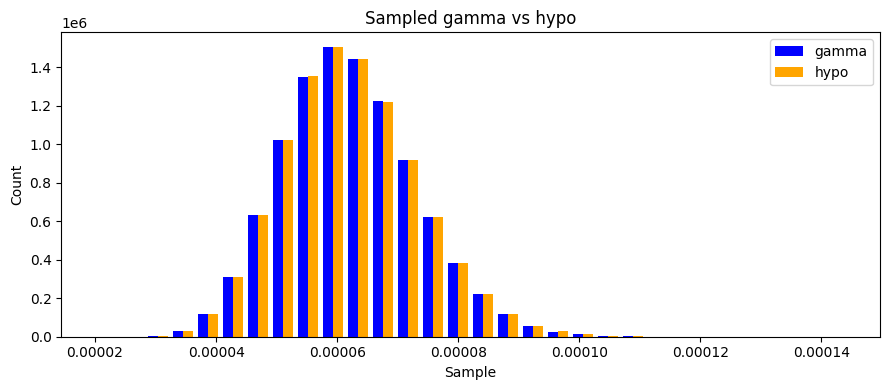

In [8]:
import math
import numpy as np
import importlib
import gamma
importlib.reload(gamma)

n = 10**3
k = round(math.sqrt(n))
# k = n
o = 2
g = 1
trials = 10**7
seed = 7
figsize = (9,4)

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas_params = gamma.gammas_params_matching_hypo(n, k, o, g, 1)
# %timeit gamma.gammas_params_matching_hypo(n, k, o, g, 1)
print(f'{gammas_params=}')
gammas_samples = gamma.sample_gammas_sum(rng, gammas_params, trials)
# %timeit gamma.sample_gammas_sum(rng, gammas_params, 1)
hypo_samples = gamma.sample_hypos(rng, n, k, o, g, trials)
# %timeit gamma.sample_hypo(rng, n, k, o, g, 1)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Sampled gamma vs hypo')
ax.legend()

plt.tight_layout()
plt.show()

using geometric mean shortcut for variance of hypoexponential
    first_term=4.000800120016002e-16
     last_term=3.8462057625318347e-16
relative_error=0.04019399039701988
     geom_mean=3.922741449081701e-16
with direct=    0, mean=1.980592157641351e-06, var=3.922741449081701e-14
gammas=array([[1.00000098e+02, 1.98059022e-08]])


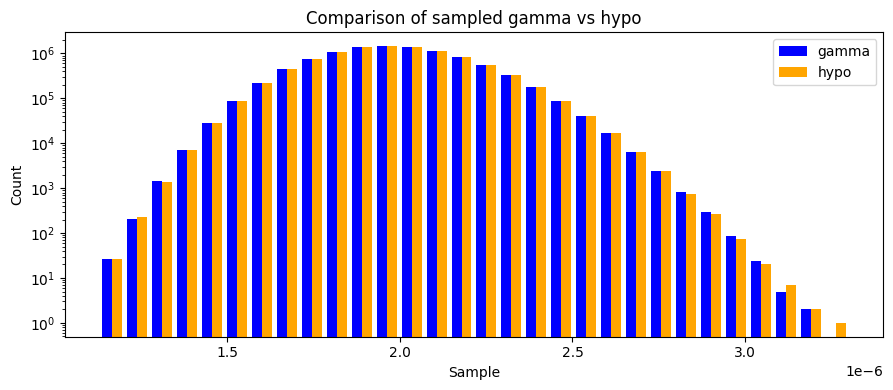

In [9]:
from math import sqrt
import numpy as np
import importlib
import gamma
importlib.reload(gamma)

n = 10**4
k = round(sqrt(n))
o = 2
g = 1
trials = 10**7
seed = 0

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_params_matching_hypo(n, k, o, g, 1)
print(f'{gammas=}')
gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
# gammas_samples = gamma.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypos(rng, n, k, o, g, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gamma vs hypo')
ax.legend()

# Show the plot
plt.tight_layout()
plt.yscale('log')
# plt.show()